<a href="https://colab.research.google.com/github/nisarg0/Assignments/blob/master/DMDW_Asg2(Extern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from math import sqrt

In [2]:
path="/content/drive/MyDrive/DWDM/house_prices.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000


In [35]:
df.isnull().values.any()

False

In [4]:
df.shape

(1379, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1379 non-null   float64
 1   LotArea        1379 non-null   int64  
 2   OverallQual    1379 non-null   int64  
 3   OverallCond    1379 non-null   int64  
 4   YearBuilt      1379 non-null   int64  
 5   YearRemodAdd   1379 non-null   int64  
 6   MasVnrArea     1379 non-null   float64
 7   BsmtFinSF1     1379 non-null   int64  
 8   BsmtFinSF2     1379 non-null   int64  
 9   BsmtUnfSF      1379 non-null   int64  
 10  TotalBsmtSF    1379 non-null   int64  
 11  1stFlrSF       1379 non-null   int64  
 12  2ndFlrSF       1379 non-null   int64  
 13  LowQualFinSF   1379 non-null   int64  
 14  GrLivArea      1379 non-null   int64  
 15  BsmtFullBath   1379 non-null   int64  
 16  BsmtHalfBath   1379 non-null   int64  
 17  FullBath       1379 non-null   int64  
 18  HalfBath

Mean:  185479.511240029 
Median:  167500.0 
Mode:  140000


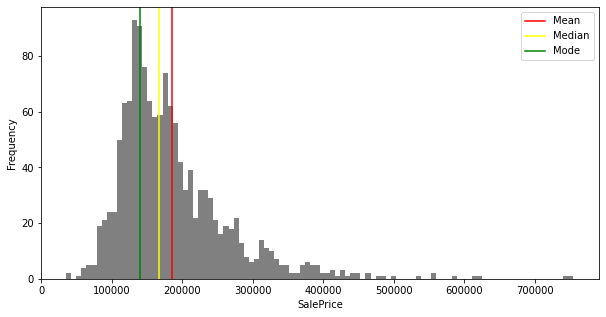

In [7]:
saleprice = df['SalePrice']

mean=saleprice.mean()
median=saleprice.median()
mode=saleprice.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(saleprice,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
saleprice.cumsum().head()

0     208500
1     390000
2     613500
3     753500
4    1003500
Name: SalePrice, dtype: int64

In [36]:
print("Minimum salesprice of a house is : ",saleprice.min()) #maximum value of salePrice
print("Maximum salesprice of a house is : ",saleprice.min()) #minimum value of salePrice
print("Range of prices is : ", saleprice.max()-saleprice.min()) #Range
print("Variance of salesprices is : ",saleprice.var()) #variance

Minimum salesprice of a house is :  35311
Maximum salesprice of a house is :  35311
Range of prices is :  719689
Variance of salesprices is :  6244775285.521461


In [13]:
#standard deviation
std = sqrt(saleprice.var())
std

79023.89059975129

In [14]:
#skewness
saleprice.skew()

1.935362098363132

In [15]:
#kutosis
saleprice.kurt()

6.735649337267559

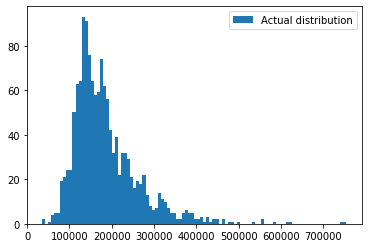

In [39]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['SalePrice'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
# plt.hist(h, density=True, stacked=True)
plt.hist(h,bins = 100,label="Actual distribution")      
plt.legend()
plt.show() 

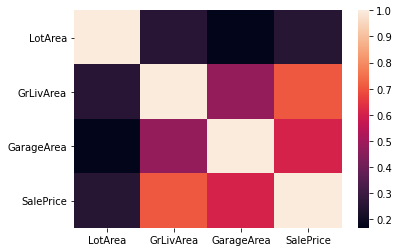

In [26]:
#checking correlation of 4 countinous variables
%matplotlib inline
corelation=df[['LotArea','GrLivArea','GarageArea','SalePrice']].corr()
corelation

sns.heatmap(corelation)

In [27]:
#covariance
df[['LotArea','GrLivArea','GarageArea','SalePrice']].cov().head()

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,1.043401e+08,1.364127e+06,3.179236e+05,2.041596e+08
GrLivArea,1.364127e+06,2.695069e+05,4.615466e+04,2.905241e+07
GarageArea,3.179236e+05,4.615466e+04,3.447726e+04,8.927251e+06
SalePrice,2.041596e+08,2.905241e+07,8.927251e+06,6.244775e+09


In [28]:
# #50 percentile i.e median
# np.percentile(df['salary'], 50)

saleprice.quantile(0.5)

167500.0

In [29]:
# q75 = np.percentile(df['salary'], 75)
# q75

q3 = saleprice.quantile(0.75)
q3

217750.0

In [30]:
#25th percentile
# q25 = np.percentile(df['salary'], 25)
q1 = saleprice.quantile(0.25)
q1

134000.0

In [31]:
#interquartile range
IQR = q3  - q1
IQR

83750.0

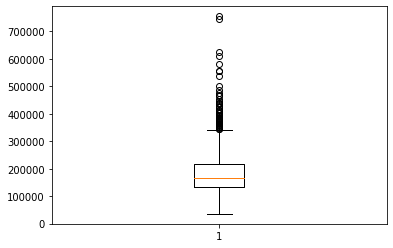

In [32]:
plt.boxplot(saleprice)
plt.show()

In [33]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,57.766497,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.364757,455.578680,48.102248,570.765047,1074.445975,1177.129804,353.424946,4.134880,1534.689630,0.430747,0.058738,1.580131,0.395939,2.865120,1.038434,6.552574,0.641769,1978.506164,1.870921,500.762146,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,2007.812183,185479.51124
std,35.038221,10214.702133,1.345780,1.081031,29.379883,20.444852,184.195220,459.691379,164.324665,443.677845,436.371874,387.014961,439.553171,40.130546,519.140514,0.514052,0.238285,0.548051,0.502402,0.783961,0.196048,1.589821,0.645985,24.689725,0.630055,185.680520,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,1.330221,79023.89060
min,0.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,35311.00000
25%,41.500000,7741.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,228.000000,810.000000,894.000000,0.000000,0.000000,1154.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,134000.00000
50%,64.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,0.000000,476.000000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,167500.00000
75%,79.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,170.500000,732.000000,0.000000,811.000000,1314.000000,1414.000000,738.500000,0.000000,1790.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,580.000000,171.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,217750.00000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.00000
